# Heart Disease Prediction using MLP

We build a simple classifier to predict **Heart Disease** (0/1) from clinical features.

Model:  
- One-hot encode categorical features  
- Standardise numeric features  
- Train a **Multilayer Perceptron (MLP)** classifier  

Steps:
1. Load and inspect the dataset  
2. Check target distribution  
3. Preprocess features (encode categoricals)  
4. Train–test split  
5. Build and train MLP pipeline  
6. Evaluate with accuracy, report, and confusion matrix


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

%matplotlib inline

DATA_PATH = "heart_disease_dataset.csv"
RANDOM_STATE = 42


## 1. Load and preview the dataset


In [9]:
df = pd.read_csv(DATA_PATH)

print("Shape:", df.shape)
df.head()


Shape: (1000, 16)


,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


## 2. Target distribution (Heart Disease)

We look at how many patients have heart disease (1) vs not (0).


Heart Disease
0    608
1    392
Name: count, dtype: int64


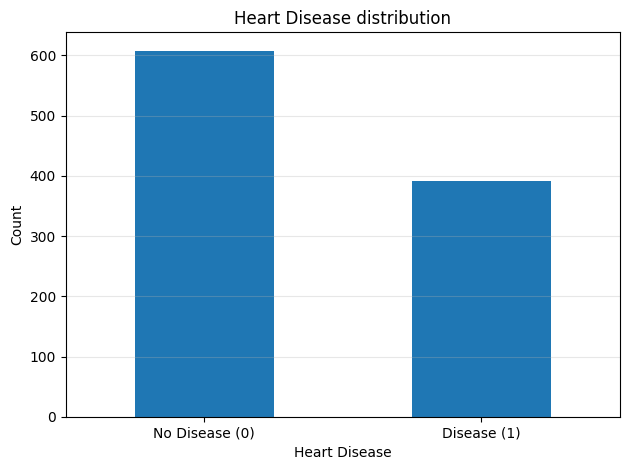

In [10]:
print(df["Heart Disease"].value_counts())

df["Heart Disease"].value_counts().plot(kind="bar")
plt.xticks([0, 1], ["No Disease (0)", "Disease (1)"], rotation=0)
plt.ylabel("Count")
plt.title("Heart Disease distribution")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


## 3. Preprocess features

We:
- Separate features `X` and target `y`
- One-hot encode **categorical** columns


In [11]:
# Separate X and y
X = df.drop(columns=["Heart Disease"])
y = df["Heart Disease"]

# Detect categorical columns automatically (object dtype)
cat_cols = X.select_dtypes(include="object").columns.tolist()
print("Categorical columns:", cat_cols)

# One-hot encode categoricals
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

print("Shape after encoding:", X_encoded.shape)
X_encoded.head()


Categorical columns: ['Gender', 'Smoking', 'Alcohol Intake', 'Family History', 'Diabetes', 'Obesity', 'Exercise Induced Angina', 'Chest Pain Type']
Shape after encoding: (1000, 18)


,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Gender_Male,Smoking_Former,Smoking_Never,Alcohol Intake_Moderate,Family History_Yes,Diabetes_Yes,Obesity_Yes,Exercise Induced Angina_Yes,Chest Pain Type_Atypical Angina,Chest Pain Type_Non-anginal Pain,Chest Pain Type_Typical Angina
0,75,228,119,66,1,8,119,False,False,False,False,False,False,True,True,True,False,False
1,48,204,165,62,5,9,70,True,False,False,False,False,False,False,True,False,False,True
2,53,234,91,67,3,5,196,True,False,True,False,True,False,True,True,True,False,False
3,69,192,90,72,4,7,107,False,False,False,False,False,True,False,True,False,True,False
4,62,172,163,93,6,2,183,False,False,True,False,False,True,False,True,False,False,False


## 4. Train–test split

We split encoded features and labels into training and test sets (80/20).


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.2,
    stratify=y,
    random_state=RANDOM_STATE
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])


Train size: 800
Test size: 200


## 5. Build and train the MLP model

Pipeline:
1. `StandardScaler` to scale features  
2. `MLPClassifier` as the neural network


In [13]:
mlp_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(
        hidden_layer_sizes=(64, 32),  # two hidden layers
        activation="relu",
        solver="adam",
        alpha=1e-4,
        max_iter=200,
        random_state=RANDOM_STATE
    ))
])

print("Training MLP...")
mlp_pipe.fit(X_train, y_train)
print("Done.")


Training MLP...
Done.


## 6. Evaluate the model

We compute:
- Test accuracy  
- Classification report  
- Confusion matrix (heatmap)


Test accuracy: 0.9350

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       122
           1       0.93      0.90      0.92        78

    accuracy                           0.94       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.94      0.93       200


Confusion matrix:
 [[117   5]
 [  8  70]]


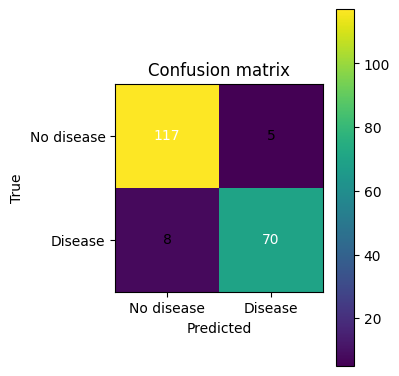

In [14]:
y_pred = mlp_pipe.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {acc:.4f}\n")

# Classification report
print("Classification report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
print("\nConfusion matrix:\n", cm)

plt.figure(figsize=(4, 4))
plt.imshow(cm)
plt.xticks([0, 1], ["No disease", "Disease"])
plt.yticks([0, 1], ["No disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix")
plt.colorbar()
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center",
                 color="white" if cm[i, j] > cm.max()/2 else "black")
plt.tight_layout()
plt.show()
